In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from MLP import MLP
import os;
from compare_data import compare_with_data
from utils import get_mean_norm, log_to_lin, lin_to_log
from iterators import data_iterators



    Using M = 0
        P = 94.912
        K = 9.491
        T = 0.209
    Error: 7.70%
    


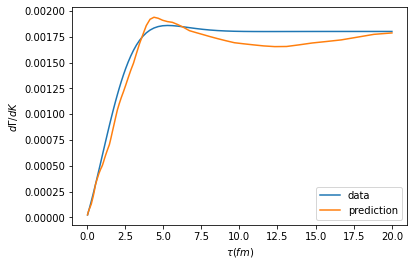

In [9]:
h_dim = 64
n_layers = 8
method = '0'
batch_size = 64
pc_err = "2.49e-02"

datafile = f'method_{method}.csv'

(_, _, test), consts_dict = data_iterators(
    batch_size=batch_size,
    datafile=datafile
    )

model_file = f'M_{method}_n_layers_{n_layers}_hid_dim_{h_dim}_val_pc_err={pc_err}.ckpt'
model_path = os.path.join("Results", "saved_models", f'Method_{method}', model_file)
model = MLP.load_from_checkpoint(
    checkpoint_path=model_path,
    hidden_dim=h_dim,
    n_layers=n_layers,
    consts_dict=consts_dict
    )

P = 100
K = 10
T = 0.2

compare_with_data(P, K, T, datafile, model, h_dim, n_layers)

In [10]:
Ks = np.linspace(0.1, 0.9, 9, endpoint=True)
Ts =  np.linspace(0.05, 1, 10).round(3)
ts = np.logspace(np.log10(0.05), np.log10(20), 100).round(3)

# p_mean, p_norm = get_mean_norm(Ps)
T_mean, T_norm = get_mean_norm(Ts, log=False)
t_mean, t_norm = get_mean_norm(ts)

# print(p_mean, p_norm)
splits = 3
Ps = np.logspace(np.log10(5), 3, 10).round(3)
lin_spaced = np.log10(Ps)
print(lin_spaced)
for i in range(splits):
    l2 = (lin_spaced[1:] + lin_spaced[:-1])/2
    lin_spaced = np.concatenate((lin_spaced, l2))
    lin_spaced = np.unique(lin_spaced)
    lin_spaced = np.sort(lin_spaced)
print(lin_spaced)

# Ps = np.logspace(np.log10(5), 3, 20).round(3)
# print(Ps)
# print(log_to_lin(Ps, p_mean, p_norm))
# print(lin_to_log(log_to_lin(Ps, p_mean, p_norm), p_mean, p_norm))

[0.69897    0.95462838 1.21031852 1.46597737 1.72165401 1.97732113
 2.23299103 2.48866069 2.74432976 3.        ]
[0.69897    0.7309273  0.7628846  0.79484189 0.82679919 0.85875649
 0.89071378 0.92267108 0.95462838 0.98658965 1.01855091 1.05051218
 1.08247345 1.11443472 1.14639598 1.17835725 1.21031852 1.24227588
 1.27423323 1.30619059 1.33814794 1.3701053  1.40206266 1.43402001
 1.46597737 1.49793695 1.52989653 1.56185611 1.59381569 1.62577527
 1.65773485 1.68969443 1.72165401 1.7536124  1.78557079 1.81752918
 1.84948757 1.88144596 1.91340435 1.94536274 1.97732113 2.00927986
 2.0412386  2.07319734 2.10515608 2.13711482 2.16907355 2.20103229
 2.23299103 2.26494974 2.29690844 2.32886715 2.36082586 2.39278457
 2.42474327 2.45670198 2.48866069 2.52061932 2.55257795 2.58453659
 2.61649522 2.64845386 2.68041249 2.71237113 2.74432976 2.77628854
 2.80824732 2.8402061  2.87216488 2.90412366 2.93608244 2.96804122
 3.        ]
